# Weather_Prediction

In [1]:
import pandas as pd 
import numpy as np 


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


import scipy.stats as st
import sklearn.metrics as sm

# Loading data

In [2]:
data = pd.read_csv('weather1.csv')
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,21-12-2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,22-12-2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,NaN
2,23-12-2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,NaN
3,24-12-2013,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,NaN
4,25-12-2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,27-07-2017,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,NaN
1315,28-07-2017,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,NaN
1316,29-07-2017,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,NaN
1317,30-07-2017,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,NaN


In [3]:
print(data.shape)
print(data.dtypes)

(1319, 21)
Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object


In [4]:
data.isnull().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   0
DewPointAvgF                    0
DewPointLowF                    0
HumidityHighPercent             0
HumidityAvgPercent              0
HumidityLowPercent              0
SeaLevelPressureHighInches      0
SeaLevelPressureAvgInches       0
SeaLevelPressureLowInches       0
VisibilityHighMiles             0
VisibilityAvgMiles              0
VisibilityLowMiles              0
WindHighMPH                     0
WindAvgMPH                      0
WindGustMPH                     0
PrecipitationSumInches          0
Events                        903
dtype: int64

In [5]:
print('Unique values in DewPointHF:\n',data.DewPointHighF.unique())
print('\nUnique values in DewPointAvgF:\n',data.DewPointAvgF.unique())
print('\nUnique values in DewPointLowF:\n',data.DewPointLowF.unique())

print('\nUnique values in HumidityHighPercent:\n',data.HumidityHighPercent.unique())
print('\nUnique values in HumidityAvgPercent:\n',data.HumidityAvgPercent.unique())
print('\nUnique values in HumidityLowPercent:\n',data.HumidityLowPercent.unique())

print('\nUnique values in SeaLevelPressureHighInches:\n',data.SeaLevelPressureHighInches.unique())
print('\nUnique values in SeaLevelPressureAvgInches:\n',data.SeaLevelPressureAvgInches.unique())
print('\nUnique values in SeaLevelPressureLowInches:\n',data.SeaLevelPressureLowInches.unique())

print('\nUnique values in VisibilityHighMiles:\n',data.VisibilityHighMiles.unique())
print('\nUnique values in VisibilityAvgMiles:\n',data.VisibilityAvgMiles.unique())
print('\nUnique values in VisibilityLowMiles:\n',data.VisibilityLowMiles.unique())

print('\nUnique values in WindHighMPH:\n',data.WindHighMPH.unique())
print('\nUnique values in WindAvgMPH:\n',data.WindAvgMPH.unique())
print('\nUnique values in WindGustMPH:\n',data.WindGustMPH.unique())

print('\nUnique values in PrecipitationSumInches:\n',data.PrecipitationSumInches.unique())

print('\nUnique values in Events:\n',data.Events.unique())

Unique values in DewPointHF:
 ['67' '43' '31' '36' '44' '39' '41' '49' '51' '37' '55' '54' '15' '29'
 '60' '64' '58' '28' '42' '22' '38' '45' '19' '59' '62' '40' '17' '53'
 '34' '48' '52' '61' '63' '33' '57' '65' '46' '32' '50' '27' '56' '47'
 '68' '69' '66' '70' '73' '71' '76' '72' '75' '74' '-' '77' '23' '35' '30'
 '79' '78' '80' '26' '18' '25' '13']

Unique values in DewPointAvgF:
 ['49' '36' '27' '28' '40' '39' '41' '26' '42' '22' '48' '32' '8' '11' '45'
 '55' '61' '37' '47' '25' '23' '20' '33' '30' '29' '17' '14' '13' '54'
 '59' '15' '24' '34' '35' '57' '50' '53' '60' '46' '56' '51' '31' '38'
 '62' '43' '63' '64' '67' '66' '58' '70' '68' '65' '69' '71' '72' '-' '73'
 '74' '21' '44' '52' '12' '75' '76' '18']

Unique values in DewPointLowF:
 ['43' '28' '23' '21' '36' '33' '37' '30' '19' '18' '38' '15' '2' '4' '50'
 '54' '20' '17' '16' '24' '10' '22' '5' '7' '9' '51' '41' '27' '39' '13'
 '29' '53' '32' '59' '44' '47' '35' '48' '12' '26' '31' '45' '52' '56'
 '49' '62' '63' '66' '60' '

In [6]:
data = data.replace(to_replace ="-", value ="0")
data = data.replace(to_replace = ' ', value = 'Nan')
data['PrecipitationSumInches'] = data[['PrecipitationSumInches']].replace('T', '0')

In [7]:
data['Date'] = pd.to_datetime(data.Date)

data['DewPointHighF'] = data['DewPointHighF'].astype(float)
data['DewPointAvgF'] = data['DewPointAvgF'].astype(float)
data['DewPointLowF'] = data['DewPointLowF'].astype(float)
data['HumidityHighPercent'] = data['HumidityHighPercent'].astype(float)
data['HumidityAvgPercent'] = data['HumidityAvgPercent'].astype(float)
data['HumidityLowPercent'] = data['HumidityLowPercent'].astype(float)
data['SeaLevelPressureHighInches'] = data['SeaLevelPressureHighInches'].astype(float)
data['SeaLevelPressureAvgInches'] = data['SeaLevelPressureAvgInches'].astype(float)
data['SeaLevelPressureLowInches'] = data['SeaLevelPressureLowInches'].astype(float)
data['VisibilityHighMiles'] = data['VisibilityHighMiles'].astype(float)
data['VisibilityAvgMiles'] = data['VisibilityAvgMiles'].astype(float)
data['VisibilityLowMiles'] = data['VisibilityLowMiles'].astype(float)
data['WindHighMPH'] = data['WindHighMPH'].astype(float)
data['WindAvgMPH'] = data['WindAvgMPH'].astype(float)
data['WindGustMPH'] = data['WindGustMPH'].astype(float)
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].astype(float)

In [8]:
label = LabelEncoder()
data['Events'] = label.fit_transform(data['Events'].astype('str'))

print(data['Events'].head())
print(data.Events.unique())

0    6
1    8
2    8
3    8
4    8
Name: Events, dtype: int32
[6 8 4 0 5 1 7 2 3]


In [9]:
data.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                        float64
DewPointAvgF                         float64
DewPointLowF                         float64
HumidityHighPercent                  float64
HumidityAvgPercent                   float64
HumidityLowPercent                   float64
SeaLevelPressureHighInches           float64
SeaLevelPressureAvgInches            float64
SeaLevelPressureLowInches            float64
VisibilityHighMiles                  float64
VisibilityAvgMiles                   float64
VisibilityLowMiles                   float64
WindHighMPH                          float64
WindAvgMPH                           float64
WindGustMPH                          float64
PrecipitationSumInches               float64
Events                                 int32
dtype: object

In [10]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [11]:
data = data.drop('Date' ,axis = 1)
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Year,Month,Day
0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,...,7.0,2.0,20.0,4.0,31.0,0.46,6,2013,12,21
1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,...,10.0,5.0,16.0,6.0,25.0,0.00,8,2013,12,22
2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,...,10.0,10.0,8.0,3.0,12.0,0.00,8,2013,12,23
3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,...,10.0,7.0,12.0,4.0,20.0,0.00,8,2013,12,24
4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,...,10.0,7.0,10.0,2.0,16.0,0.00,8,2013,12,25


<AxesSubplot:>

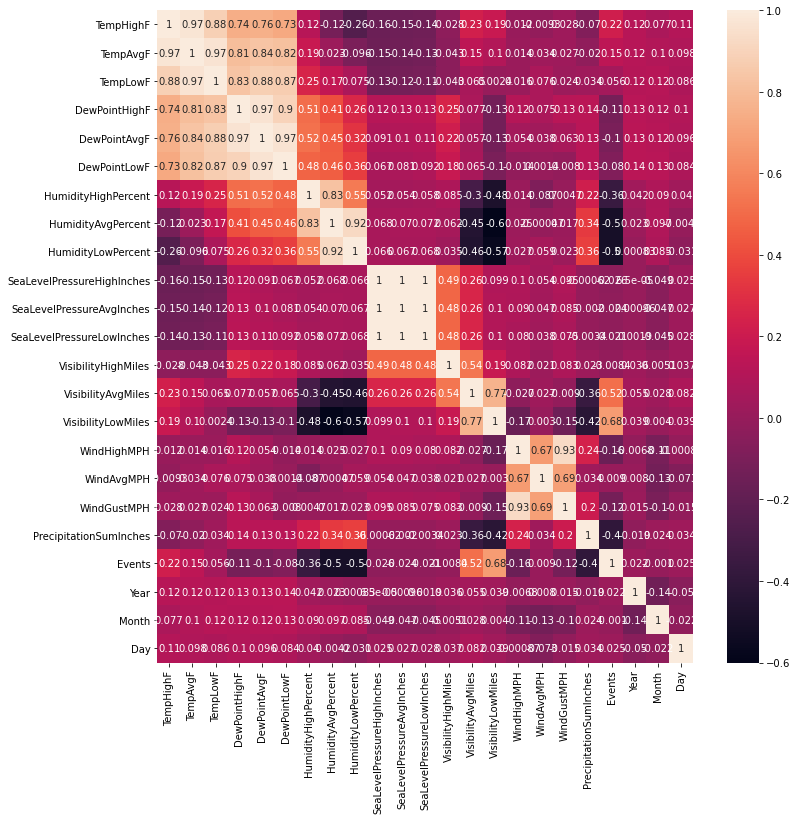

In [12]:
corrMatrix = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True,)

# Data is cleaned and ready for Regression analysis

In [13]:
x = data.drop('TempHighF' , axis = 1).values
y = data['TempHighF'].values

In [14]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y, test_size = 0.3 , random_state = 0)

In [15]:
lnr = LinearRegression()

lnr.fit(X_train,Y_train)

LinearRegression()

In [16]:
y_pred = lnr.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df.head()

,Actual,Predicted
0,90,90.451236
1,62,62.792255
2,79,78.359273
3,95,94.665517
4,83,83.499097


Text(0, 0.5, 'Predicted Values')

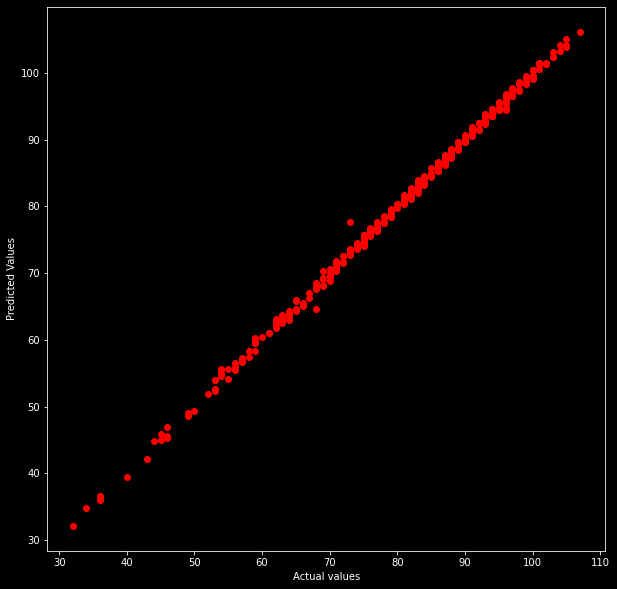

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 10))
plt.scatter(Y_test, y_pred, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

In [19]:
print("Accuracy of the model =",lnr.score(X_train, Y_train))
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, y_pred),2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, y_pred), 2))

Accuracy of the model = 0.9972749200060329
Mean absolute error = 0.49
Mean squared error = 0.37
Median absolute error = 0.46
Explain variance score = 1.0
R2 score = 1.0
